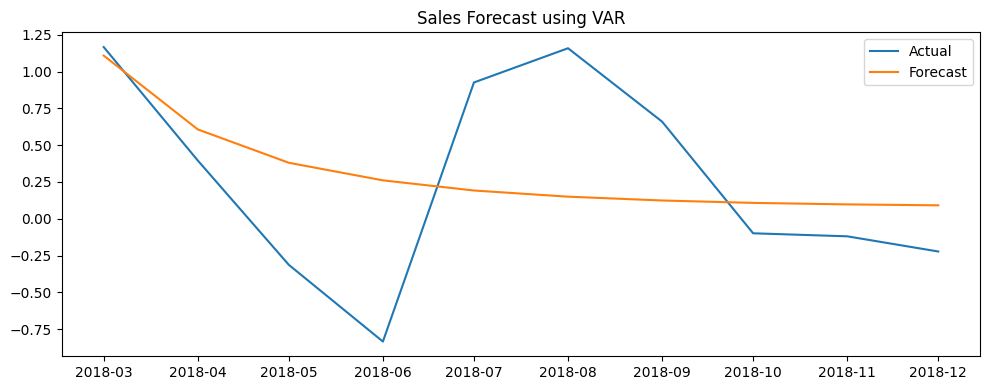

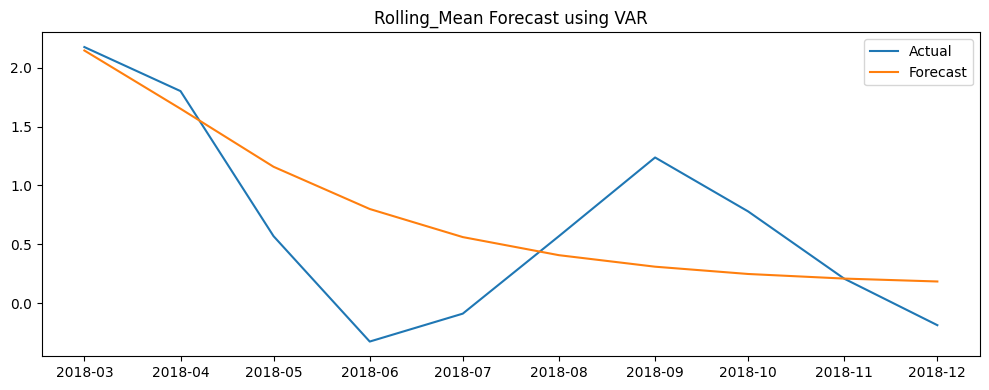

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("cleaned_sales_data.csv")
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df.set_index('Order Date', inplace=True)

# Monthly total sales
df_monthly = df['Sales'].resample('MS').sum().to_frame()

# Add synthetic second column: 3-month rolling mean
df_monthly['Rolling_Mean'] = df_monthly['Sales'].rolling(window=3).mean()

# Drop NaNs caused by rolling
df_monthly.dropna(inplace=True)

# Optional: normalize to reduce scale issues
df_monthly = (df_monthly - df_monthly.mean()) / df_monthly.std()

# Split into train/test
train_size = int(len(df_monthly) * 0.8)
train = df_monthly.iloc[:train_size]
test = df_monthly.iloc[train_size:]

# Fit VAR model with fixed lag (safe fallback)
model = VAR(train)
model_fitted = model.fit(1)  # fixed lag of 1 to avoid matrix issues

# Forecast
forecast_input = train.values[-1:]
forecast_steps = len(test)
forecast = model_fitted.forecast(y=forecast_input, steps=forecast_steps)
forecast_df = pd.DataFrame(forecast, index=test.index, columns=df_monthly.columns)

# Plot forecasts vs actual
for col in df_monthly.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(test.index, test[col], label='Actual')
    plt.plot(forecast_df.index, forecast_df[col], label='Forecast')
    plt.title(f'{col} Forecast using VAR')
    plt.legend()
    plt.tight_layout()
    plt.show()








